## 7. Modern Convolutional Neural Networks


* #### **Deep Convolutional Neural Networks (Alexnet)** 
* #### **VGG network** 
* #### **NiN(Network in Network)** 

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 7.1 Deep Convolutional Neural Networks (AlexNet)


- LeNet was famous in computer vision domain on early small datasets, but the  performance and feasibility on larger, more realistic datasets had to be established. Between the early 1990s and 2012, neural networks were often surpassed by other machine learning methods, such as support vector machines (svm).



- Although some neural network accelerators were available in the 1990s, they were not yet powerful to make deep multichannel, multilayer CNNs with a large number of parameters. 
-> 1990년대 몇몇의 neural network는 가속화되긴 했지만 충분히 multichannel, multilayer CNN에서는 powerful하진 않았음

- The pipeline of AI systems in early days looked like this (AI 파이프라인 구축 초기 시점의 문제점)
    
    1. Obtain an interesting dataset. In early days, these datasets required expensive sensors
->**관심있는 데이터를 구할시에 expensive sensor를 필요로 했음**

    2. Preprocess the dataset with **hand-crafted features based on some knowledge of optics, geometry, other analytic tools**
->**dataset을 전처리할 시에 직접 feature 를 추출해야 했음**

    3. Feed the data through a standard set of feature extractors such as the SIFT (scale-invariant feature transform), the SURF (fast and robust algorithm for local, similarity invariant representation) or any number of other hand-tuned pipelines.
->**SIFT method, SURF method 이나 기타 다른 수작업으로 시행하는 pipeline을 통해 data를 얻어야 했음**   

   4. Dump the resulting representations into your favorite classifier, likely a linear model or kernel method, to train a classifier. 
->**Linear model이나 kernel metohd와 같은 classifier를 이용한 resulting representations를 사용함**


* Computer vision researchers justifiably believed that a ** bigger or cleaner dataset or a improved feature-extraction pipeline** mattered far more to the final accuracy than any learning algorithm
-> 컴퓨터 비전 연구자들은 어떤 학습 알고리즘보다 최종 정확도에 있어 bigger 이거나 cleaner dataset 또는 개선된 feature-extraction pipeline이 훨씬 더 중요하다고 믿었음

## 7.1.1 Learning Representations



* The most important part of the pipeline was the representation. Engineering
a new set of feature functions, improving results, and writing up the method was a prominent
genre of paper. SIFT, SURF, HOG (histograms of oriented gradient), bags of visual words and similar feature extractors ruled the roost.

* They believed that **features
themselves ought to be learned**. Moreover, they believed that to be reasonably complex, **the features
ought to be hierarchically composed with multiple jointly learned layers, each with learnable parameters**

* Proposed a new variant of a
CNN, AlexNet, that achieved excellent performance in the 2012 ImageNet challenge. 


## AlexNet



<img src ="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/alexnet.svg">

**"From LeNet(left) to AlexNet(right)"**


- Architecture
    - Employed an 8-layer CNN (5 convolutional layers, 2 fully-connected hidden layers, and 1 fully-connected output layer)
   - 1st layer, convolution window shape : 11X11 (a larger convolution window is needed to capture the object), 2nd layer is reduced to 5X5, followed by 3X3
    - AlexNet has ten times more convolution channels than LeNet 
    - Activation functions changed to simpler Relu from sigmoid 
        - Relu는 1) 계산이 간단하고, 2) initialization 방법들 중에서 training이 쉬운 장점이 있음
            : sigmoid에서는 activation 값들이 0 혹은 1에 가까우면 gradient는 거의 0에 가깝기 때문에 학습이 제대로 되지 않을 수도 있지만, 반면, ReLU에서는 0보다 값이 큰 경우에는 gradient가 항상 1이기 때문에, 초기화가 잘 안되어도 학습이 잘 일어날 수 있음


* AlexNet controls the model complexity of the fully-connected layer by dropout, while LeNet only uses weight decay ->AlexNet은 fully-connected layer의 모델 복잡성을 dropout으로 제어하는 ​​반면 LeNet은 weight decay (가중치 감소)만 사용

### Codes

- 차원 
   - torch.Size([batch , channel, x_shape, y_shape])

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

alexnet = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects
    # We use a stride of 4 to greatly reduce the height and width of the output
    nn.Conv2d(1,96, kernel_size=11, stride=4, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    
    # Pooling layers are not used to reduce the height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate overfitting
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

alexnet

Sequential(
  (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=6400, out_features=4096, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=4096, out_features=4096, bias=True)
  (18): Linear(in_features=4096, out_features=4096, bias=True)
  (19): ReLU(

In [ ]:
X = torch.randn(1,1,224,224)
for layer in alexnet:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1,

### Reading the Dataset

In [ ]:
from d2l import torch as nn

In [ ]:
batch_size = 128
train_iter, test_iter = nn.load_data_fashion_mnist(batch_size, resize=224)

# train_iter, test_iter DataLoader에 해당하는 class.
# dataloader는 데이터를 자동적으로 feeding 해주는 모듈

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### Training
- Define learning rate, and the number of epoch 
- The main change is the use of a smaller learning rate (in case of LeNet the lr is set with 0.9) and much slower training due to the depper and wider network, the higher image resolution, and the more costly convolutions

loss 0.310, train acc 0.886, test acc 0.889
1367.3 examples/sec on cuda:0


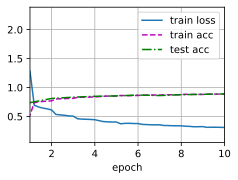

In [ ]:
lr, num_epochs = 0.01, 10
nn.train_ch6(alexnet, train_iter, test_iter, num_epochs, lr, nn.try_gpu())

## train_ch6는 torch에는 없는 모듈.
## alexnet 입력 받고, train_iter, test_iter, epoch, lr를 가지고 training 

## Summary

* AlexNet has a similar structure to that of LeNet, but uses more convolutional layers and a larger parameter space to fit the large-scale ImageNet dataset. -> AlexNet는 LeNet과 비슷하지만 ImageNet 데이터에 사용하기 위해 Convolutional layer를 더 많이 사용했음
* AlexNet has been surpassed by much more effective architectures but it is a key step from shallow to deep networks -> AlexNet은 훨씬 더 효과적인 architectures 에 의해 능가되었지만 shallow 에서 deep networks 로 가는 핵심 모델임

* Dropout, ReLU, and preprocessing were the other key steps in achieving excellent performance in computer vision tasks. -> Dropout, ReLU, preprocessing이 중요한 key였음




## Exercises

1. Try increasing the number of epochs (from 10 into 20). Compared with LeNet, how are the results different?
Why?

loss 0.172, train acc 0.935, test acc 0.913
1377.0 examples/sec on cuda:0


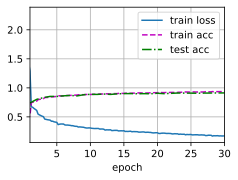

In [ ]:
'''lr, num_epochs = 0.01, 20
nn.train_ch6(alexnet, train_iter, test_iter, num_epochs, lr, nn.try_gpu())'''

In [ ]:
# LeNet
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

In [ ]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None): 
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # No. of correct predictions, no. of predictions
    metric = d2l.Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # Required for BERT Fine-tuning (to be covered later)
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU (defined in Chapter 6)."""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.354, train acc 0.869, test acc 0.852
43231.7 examples/sec on cuda:0


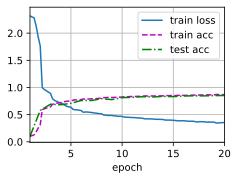

In [ ]:
'''lr, num_epochs = 0.9, 20
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())'''


2. AlexNet may be too complex for the Fashion-MNIST dataset.
  1. Try simplifying the model to make the training faster, while ensuring that the accuracy
does not drop significantly.
  2. Design a better model that works directly on 28 X 28 images.
3. Modify the batch size, and observe the changes in accuracy and GPU memory.
4. Analyze computational performance of AlexNet.
  1. What is the dominant part for the memory footprint of AlexNet?
  2. What is the dominant part for computation in AlexNet?
  3. How about memory bandwidth when computing the results?

5. Apply dropout and ReLU to LeNet-5. Does it improve? 

In [ ]:
'''# LeNet (apply dropout and ReLU)
net2 = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(), #
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(), #
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.ReLU(), #
    nn.Dropout(p=0.5), #
    nn.Linear(120, 84), nn.ReLU(), #
    nn.Dropout(p=0.5), #
    nn.Linear(84, 10))'''

In [ ]:
'''X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net2:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)'''

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Dropout output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Dropout output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


loss 2.304, train acc 0.099, test acc 0.100
39995.9 examples/sec on cuda:0


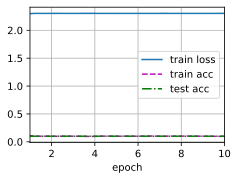

In [ ]:
'''lr, num_epochs = 0.9, 10 
train_ch6(net2, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())'''

# 7.2 Networks Using Blocks (VGG)


* While AlexNet offered empirical evidence that deep CNNs
can achieve good results, it did not provide a general template
to guide subsequent researchers in designing new networks.
-> AlexNet은 deep CNN이 good result로 도달할 수 있다는 empirical evidence는 제공했지만 new network를 디자인 하기위한 후속 연구로까지 진행하기에는 부족함이 있었음

* The design of neural network architectures
had grown progressively more abstract,
with researchers moving from thinking in terms of
individual neurons to whole layers,
and now to blocks, repeating patterns of layers.
-> 기존의 사고방식은 한 개의 뉴런에 집중하는 것이었지만, 여러개의 뉴런, 즉, 레이어에 집중하는 방식으로 관심이 옮겨갔음(block 단위로 생각을 하게 되었음)





## **7.2.1 VGG Blocks**

* The basic building block of classic CNNs
is a sequence of the following:
(i) a convolutional layer
with padding to maintain the resolution,
(ii) a nonlinearity such as a ReLU,
(iii) a pooling layer such
as a maximum pooling layer.
-> Classic CNN구조의 block을 만들기 위해서는 (1) convolution layer에 padding을 추가 (2) ReLU같은 activation function을 이용한 비선형성 확보 (3) maximum pooling layer와 같은 pooling layer 추가 (spatial downsampling을 위해)


* Employed convolutions with $3\times3$ kernels with padding of 1 (keeping height and width)
and $2 \times 2$ maximum pooling with stride of 2
(halving the resolution after each block).
-> VGG block에서는 padding이 1인 $3\times3$ kernels과 (height와 width를 유지하기 위한) stride가 2인 $2 \times 2$ maximum pooling (각 block이후에 해상도를 절반으로 줄이기 위한)를 사용하여 구성함

 
* The `vgg_block` function takes three arguments corresponding to the number
of convolutional layers `num_convs`, the number of input channels `in_channels`
and the number of output channels `out_channels`.
-> `vgg_block` function은 3개의 요소로 구성되어 있는데, convolutional layers (`num_convs`), input channels (`input_channels`), output channels(`out_channels`)


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs, in_channels, out_channels):
  # 비어 있는 layers 생성
    layers = []
    for _ in range(num_convs): 
      # num_convs 동안 반복해서 layers에 append를 해주게 됨
      # 추가되는 것은 nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
      # convolutional layer 추가한 후 nn.ReLU()로 activation 해주게 됨
        layers.append(nn.ReLU())
      # 이어지는 layer에서는 in_channels와 out_channels의 차원이 같아짐
        in_channels = out_channels
      # 마지막에는 MaxPool2d를 추가해줌

    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [ ]:
vgg_block(2, 128, 256)

Sequential(
  (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## **7.2.2 VGG Network**

* Like AlexNet and LeNet,
the VGG Network can be partitioned into two parts:
(1) consisting mostly of convolutional and pooling layers
and (2) consisting of fully-connected layers.


<img src ="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/vgg.svg">

**"From AlexNet to VGG that is designed from building blocks"**





* The `conv_arch` consists of a list of tuples (one per block),
where each contains two values: the number of convolutional layers
and the number of output channels,
which are precisely the arguments required to call
the `vgg_block` function.
-> `conv_arch`는 튜플 리스트로서 각 블록별로 convolution layer의 개수와 output channel수를 정의할 수 있음


* The original VGG network had 5 convolutional blocks,
among which the first two have one convolutional layer each
and the latter three contain two convolutional layers each.
The first block has 64 output channels
and each subsequent block doubles the number of output channels,
until that number reaches 512.
-> 기존의 VGG는 5개의 convolutional block을 가졌다고 함. 처음의 2개는 각 1개의 conv.layer를 가지고, 나머지 3개는 각각 2개의 conv.layer를 가짐. 첫 block은 64개의 output channel을 가지고, 512 output channel이 될때까지 더블로 채널이 확장됨



In [ ]:
# the first two have one convolutional layer each and the latter three contain two convolutional layers each
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

* Since this network uses 8 convolutional layers
and 3 fully-connected layers, it is often called VGG-11. The following code implements **VGG-11** 

In [ ]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # The convolutional part
    # convoultion 망의 갯수를 정의하고 output_channels 수를 정의해쥰 후
    # for문에 따라 블록을 만들어주게 된다.
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        # out_channels를 저장하여 다음 iteration의 in_channels로 만든다
        in_channels = out_channels

    # 마지막에 nn.Sequential 구조문으로 묶어주게 된다. 
    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # The fully-connected part
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

vggnet = vgg(conv_arch)

* We will construct a single-channel data example
with a height and width of 224 to **observe the output shape of each layer**.


In [ ]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in vggnet:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## **7.2.3 Training**

* **Since VGG-11 is more computationally-heavy than AlexNet
we construct a network with a smaller number of channels.**
-> VGG-11은 AlexNet보다 계산량이 많기 때문에 더 적은 수의 채널로 네트워크를 구성

In [ ]:
# computation이 Alexnet보다 더 많기 때문 적은 수의 channel로 구성
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
vggnet = vgg(small_conv_arch)

small_conv_arch
vggnet

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4): Seque

* Apart from using a slightly larger learning rate,
the [**model training**] process is similar to that of AlexNet 


loss 0.169, train acc 0.938, test acc 0.916
762.7 examples/sec on cuda:0


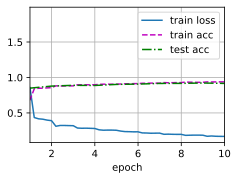

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(vggnet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## Summary

* VGG-11 constructs a network using reusable convolutional blocks. Different VGG models can be defined by the differences in the number of convolutional layers and output channels in each block.
-> VGG-11은 재사용 가능한 컨볼루션 블록을 사용하여 네트워크를 구성. 다른 VGG 모델은 각 블록의 컨볼루션 레이어 수와 출력 채널의 차이로 정의할 수 있음

* The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.
-> 블록을 사용하면 네트워크 정의를 매우 간결하게 표현하여 복잡한 네트워크를 효율적으로 설계할 수 있음 





## Exercises

1. When printing out the dimensions of the layers we only saw 8 results rather than 11. Where
did the remaining 3 layer information go?
2. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs
more GPU memory. Analyze the reasons for this.
3. Try changing the height and width of the images in Fashion-MNIST from 224 to 96. What
influence does this have on the experiments?


## **7.3 Network in Network (NiN)**

* LeNet, AlexNet, and VGG all share a common design pattern:
extract features exploiting *spatial* structure
via a sequence of convolution and pooling layers
and then post-process the representations via fully-connected layers.
-> LeNet, AlexNet, VGG의 공통점 : convolution, polling layer를 통과 시켜 spatial 구조를 활용한 feature를 추출한 후에 FCN layer를 통과시켜서 post-process를 진행하는 방식으로 구현됨. 

* The improvements upon LeNet by AlexNet and VGG mainly lie
in how these later networks widen and deepen these two modules.
Alternatively, one could imagine using fully-connected layers
earlier in the process.
-> AlexNet이나 VGG같은 경우는 추후에 network를 넓고도 깊게 쌓는 방법이라고 한다면, 대안적으로 fully connected layer를 좀 더 일찍 쌓는 방법도 있음
* However, a careless use of dense layers might give up the
spatial structure of the representation entirely, * network in network (*NiN*) blocks offer an alternative. They were proposed based on a very simple insight: to use an MLP on the channels for each pixel separately 
->그렇지만 dense layer를 일찍 사용하는 것은 spatial structure를 잃을 수도 있기 때문에, NiN block을 사용하여 대안으로 제시하고자 함
->Network in Network (NiN)은 각 채널의 픽셀에 대해서 MLP를 적용하는 아이디어 제안함





## **7.3.1 NiN Blocks**

* The inputs and outputs of convolutional layers
consist of four-dimensional tensors with axes
corresponding to the example, channel, height, and width.
* The inputs and outputs of fully-connected layers
are typically two-dimensional tensors corresponding to the example and feature.
-> Conv.layer의 input, output은 총 4차원의 tensor로 구성 (example, channel, height, and width). FCL의 input, output은 그 중에서도 2차원의 tensor (example, feature)로 구성됨

* The idea behind NiN is to apply a fully-connected layer
at each pixel location (for each height and  width).
-> NiN의 아이디어는 FCL을 각 pixel마다 (각 height와 width) 적용하자는 것임. 


* If we tie the weights across each spatial location,
we could think of this as a $1\times 1$ convolutional layer
or as a fully-connected layer acting independently on each pixel location.
-> 각 spatial location 마다 weight가 연결되고 이를 통해 1x1 conv.layer를 적용하여 FCL과 같은 영향으로 각 pixel마다 실행할 수 있음

* The main structural differences
between VGG and NiN, and their blocks.
The NiN block consists of one convolutional layer
followed by two $1\times 1$ convolutional layers that act as
per-pixel fully-connected layers with ReLU activations.
-> VGG와 NiN의 차이는 NiN 블록은 2개의 $1\times 1$ conv. layer로 이어진다는 것이고 $1\times 1$ conv. layer 각 픽셀마다 ReLU actiovation을 취한 FCL과 동일한 역할을 함 

<img src ="https://raw.githubusercontent.com/d2l-ai/d2l-en/master/img/nin.svg">

**"Comparing architectures of VGG and NiN, and their blocks."**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
  # input은 in_channel, out_channels, 커널의 크기, stride, padding여부
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

## **7.3.2 NiN Model**

* NiN uses convolutional layers with window shapes
of $11 \times 11$, $5 \times 5$, and $3 \times 3$,
and the corresponding numbers of output channels are the same as in AlexNet. Each NiN block is followed by a maximum pooling layer
with a stride of 2 and a window shape of $3\times 3$.
-> NiN은 conv.layer를 각각 $11 \times 11$, $5 \times 5$, and $3 \times 3$로 쌓음. 또한 output 채널은 AlexNet과 동일하게 두었음. 각각의 NiN 블록은 $3*3$이며 stride가 2인 MPL로 연결됨

* One significant difference between NiN and AlexNet
is that NiN avoids fully-connected layers altogether.
-> AlexNet과의 차이는 NiN은 FCL을 쓰는 것을 피한다는 것임.

* Instead, NiN uses an NiN block with a number of output channels equal to the number of label classes, followed by a *global* average pooling layer,
yielding a vector of logits.
-> 대신 NiN은 NiN 블록을 사용하는데 output 채널이 label 클래스의 수와 동일한 것을 사용하게 되고 global APL로 연결하게 됨
* One advantage of NiN's design is that it significantly
reduces the number of required model parameters.
However, this design sometimes requires
increased model training time.
-> NiN 디자인의 장점은 model parpameter수를 줄인다는 것과 그렇지만 실제적으로 이러한 디자인은 model training time을 증가시킬 수도 있다는 것임



In [ ]:
ninnet = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # Transform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in ninnet:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## **7.3.3 Training**

As before we use Fashion-MNIST to train the model.
NiN's training is similar to that for AlexNet and VGG.


loss 0.919, train acc 0.686, test acc 0.689
1058.4 examples/sec on cuda:0


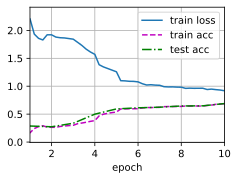

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(ninnet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## Summary

* NiN uses blocks consisting of a convolutional layer and multiple $1\times 1$ convolutional layers. This can be used within the convolutional stack to allow for more per-pixel nonlinearity.
-> NiN의 block은 $1\times 1$의 conv.layer로 구성되고 이는 픽셀마다 비선형적으로 쌓는 형태임. 
* NiN removes the fully-connected layers and replaces them with global average pooling (i.e., summing over all locations) 
-> NiN은 FCL을 제거하고 대신 맨 나중에 GAP(global averge pooling)을 이용함 (모든 location에 대한 weight값을 average pooling하는 과정임)
* Removing the fully-connected layers reduces overfitting. NiN has dramatically fewer parameters.
-> FCL을 제거하는 것은 overfitting을 감소시킬 수 있고 특히 parameter를 적게 하는 장점이 존재함






## Exercises

1. Tune the hyperparameters to improve the classification accuracy.
1. Why are there two $1\times 1$ convolutional layers in the NiN block? Remove one of them, and then observe and analyze the experimental phenomena.



In [ ]:
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

In [ ]:
ninnet = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # Transform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in ninnet:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.848, train acc 0.671, test acc 0.677
1461.2 examples/sec on cuda:0


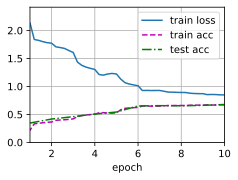

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(ninnet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

3. Calculate the resource usage for NiN.
    1. What is the number of parameters?
    1. What is the amount of computation?
    1. What is the amount of memory needed during training?
    1. What is the amount of memory needed during prediction?
4. What are possible problems with reducing the $384 \times 5 \times 5$ representation to a $10 \times 5 \times 5$ representation in one step?